In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [39]:
'''
params options

na_data will fill missing data with 'unknown', delete missing data or do nothing
input options are...
    * 'fill'
    * 'drop'
    * False

drop_outlier_days removes pets who have a lenght of stay exceeding the value YOU enter
input options are...
    * False
    * or any integer

sample_dict controls stratified sampling
    * stratify_col: a column name used for stratified sampling... spelling and caps must be exact
    * train_size: a fraction of data you want for the training data
    * validate_size: a fraction of data you want for the validate data
    * test_size: a fraction of data you want for the test data
'''

params = {
        'na_data': 'fill',
        'drop_outlier_days': 300,
        'sample_dict':
            {
            'stratify_col':'Type',
            'train_size':.98, 'validate_size':0.01, 'test_size':0.01
            }
        }
train_df, validate_df, test_df = load_df(params)
df = pd.concat([train_df, validate_df, test_df], ignore_index=True) # do this if you want to look at all the data still

/Users/jessicahuber/source/capstone/utils.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date Of Birth'].fillna('01/01/1900', inplace=True)


Date Of Birth is NOT A STRING
Intake Date is NOT A STRING
Outcome Date is NOT A STRING
Days in Shelter is NOT A STRING
Count is NOT A STRING
replace null values in Name with 'Unknown'
replace null values in Size with 'Unknown'
replace null values in Outcome_Type with 'Unknown'
replace null values in Outcome_Subtype with 'Unknown'
replace null values in Outcome_Condition with 'Unknown'
replace null values in Outcome_Jurisdiction with 'Unknown'
replace null values in Outcome_Zip_Code with 'Unknown'
replace null values in Location with 'Unknown'


/Users/jessicahuber/source/capstone/utils.py:148: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [40]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date_Of_Birth',
       'Impound_Number', 'Kennel_Number', 'Animal_ID', 'Intake_Date',
       'Outcome_Date', 'Days_in_Shelter', 'Intake_Type', 'Intake_Subtype',
       'Outcome_Type', 'Outcome_Subtype', 'Intake_Condition',
       'Outcome_Condition', 'Intake_Jurisdiction', 'Outcome_Jurisdiction',
       'Outcome_Zip_Code', 'Location', 'Multiple_Visit_Count',
       'Age_inDays_at_Outcome', 'Age_Group', 'Is_Aggressive', 'Has_Name',
       'Is_Fixed', 'Is_Mixed_Breed', 'Is_Multicolor'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25235 entries, 0 to 25234
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Name                   25235 non-null  object        
 1   Type                   25235 non-null  object        
 2   Breed                  25235 non-null  object        
 3   Color                  25235 non-null  object        
 4   Sex                    25235 non-null  object        
 5   Size                   25235 non-null  object        
 6   Date_Of_Birth          25235 non-null  datetime64[ns]
 7   Impound_Number         25235 non-null  object        
 8   Kennel_Number          25235 non-null  object        
 9   Animal_ID              25235 non-null  object        
 10  Intake_Date            25235 non-null  datetime64[ns]
 11  Outcome_Date           25235 non-null  datetime64[ns]
 12  Days_in_Shelter        25235 non-null  int64         
 13  I

In [42]:
df.describe()

,Date_Of_Birth,Intake_Date,Outcome_Date,Days_in_Shelter,Multiple_Visit_Count,Age_inDays_at_Outcome,Is_Aggressive,Has_Name,Is_Fixed,Is_Mixed_Breed,Is_Multicolor
count,25235,25235,25235,25235.000000,25235.000000,25235.000000,25235.000000,25235.000000,25235.000000,25235.000000,25235.000000
mean,1991-08-29 21:44:35.284327296,2018-08-17 08:35:37.602536192,2018-09-04 12:09:19.793937408,18.148405,1.334535,9867.600515,0.049257,0.789221,0.633485,0.288686,0.512027
min,1900-01-01 00:00:00,2013-08-17 00:00:00,2014-01-01 00:00:00,0.000000,1.000000,-1336.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006-03-26 00:00:00,2016-02-06 00:00:00,2016-02-23 00:00:00,1.000000,1.000000,275.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2014-03-12 00:00:00,2018-04-14 00:00:00,2018-04-28 00:00:00,9.000000,1.000000,1115.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2017-08-19 00:00:00,2021-02-06 12:00:00,2021-02-23 00:00:00,24.000000,1.000000,4383.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2024-05-12 00:00:00,2024-05-15 00:00:00,2024-05-16 00:00:00,298.000000,19.000000,45426.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,NaN,NaN,27.804476,1.036732,17028.239430,0.216408,0.407870,0.481862,0.453161,0.499865


<Axes: ylabel='Frequency'>

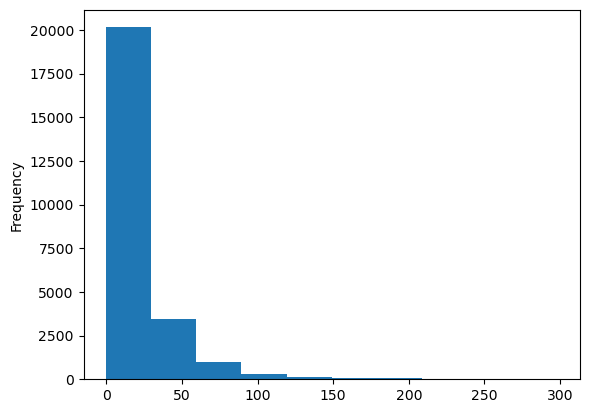

In [43]:
df.Days_in_Shelter.plot.hist()

## Animal Gender

In [44]:
df.Sex.unique()

array(['FEMALE', 'MALE', 'UNKNOWN'], dtype=object)

## Animal Breed

In [45]:
print(f'there are {len(df.Breed.unique())} unique breeds')
cat_breed_count = len(df.Breed[df.Type=='CAT'].unique())
print(f'cat breeds: {cat_breed_count}')
dog_breed_count = len(df.Breed[df.Type=='DOG'].unique())
print(f'dog breeds: {dog_breed_count}')

there are 938 unique breeds
cat breeds: 58
dog breeds: 880


In [46]:
df.Type.value_counts()

Type
DOG    15491
CAT     9744
Name: count, dtype: int64

Text(0.5, 1.0, 'CAT Breeds')

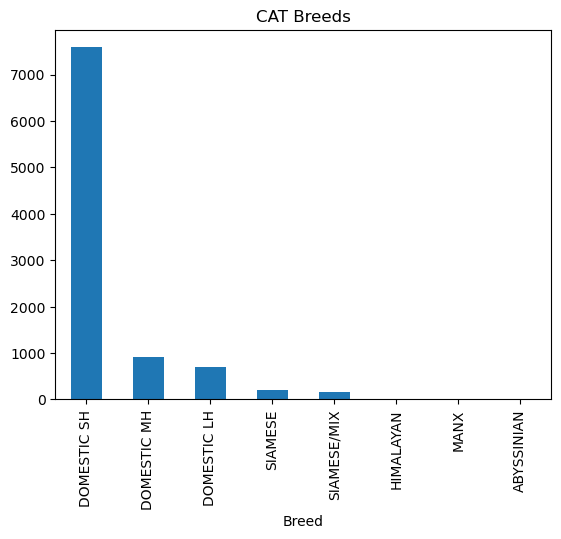

In [47]:
df[df.Type=='CAT'].Breed.value_counts()[0:8].plot.bar()
plt.title('CAT Breeds')

Text(0.5, 1.0, 'DOG Breeds')

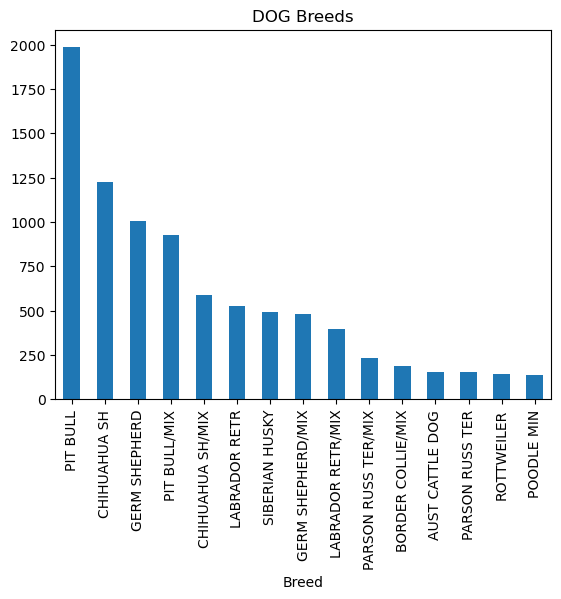

In [48]:
df[df.Type=='DOG'].Breed.value_counts()[0:15].plot.bar()
plt.title('DOG Breeds')

## Animal Type

In [49]:
df.Type.unique()

array(['DOG', 'CAT'], dtype=object)

## Animal Size

Text(0.5, 1.0, 'CAT Sizes')

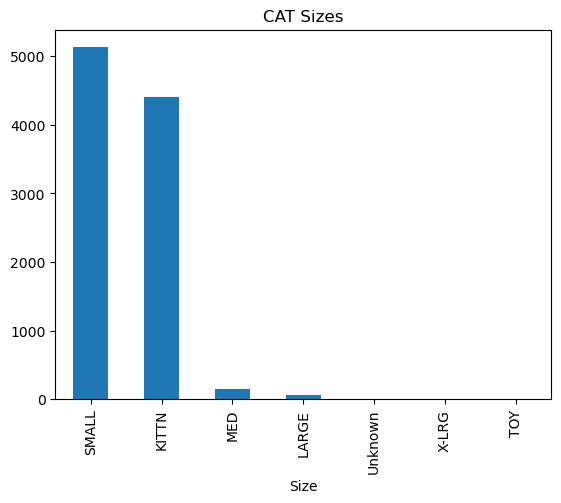

In [50]:
df[df.Type=='CAT'].Size.value_counts().plot.bar()
plt.title('CAT Sizes')

Text(0.5, 1.0, 'DOG Sizes')

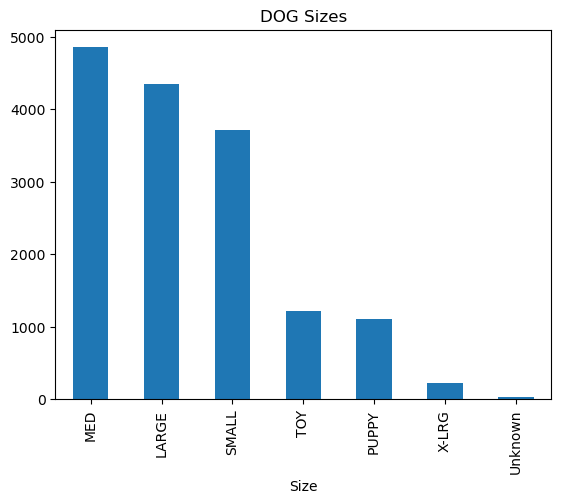

In [51]:
df[df.Type=='DOG'].Size.value_counts().plot.bar()
plt.title('DOG Sizes')

## What colors do we have?

In [52]:
print(f'there are {len(df.Color.unique())} unique colors')
breed_color = len(df.Color[df.Type=='CAT'].unique())
print(f'cat colors: {breed_color}')
breed_color = len(df.Color[df.Type=='DOG'].unique())
print(f'dog colors: {breed_color}')
print()
print(df.Color.value_counts())

there are 322 unique colors
cat colors: 170
dog colors: 211

Color
BLACK/WHITE          2952
BLACK                2423
BRN TABBY            1459
WHITE                1226
BLACK/TAN            1210
                     ... 
BRN TIGER/BROWN         1
RED TICK/WHITE          1
LYNX PT/BRN TABBY       1
BLACK/BRN MERLE         1
ORANGE/BUFF             1
Name: count, Length: 322, dtype: int64


Text(0.5, 1.0, 'DOG colors')

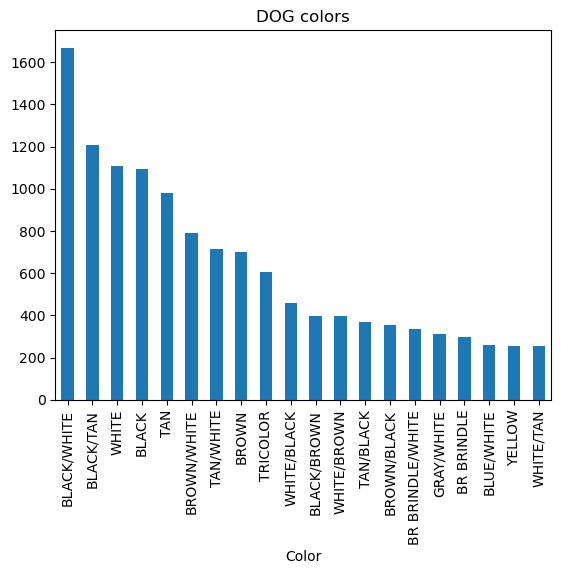

In [53]:
df[df.Type=='DOG'].Color.value_counts()[:20].plot.bar()
plt.title('DOG colors')

Text(0.5, 1.0, 'cat colors')

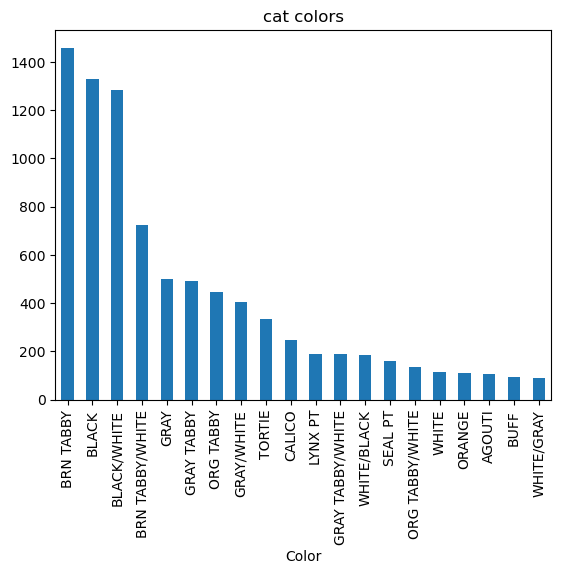

In [54]:
df[df.Type=='CAT'].Color.value_counts()[:20].plot.bar()
plt.title('cat colors')

## Intake Type is skewed

Text(0.5, 1.0, 'intake type')

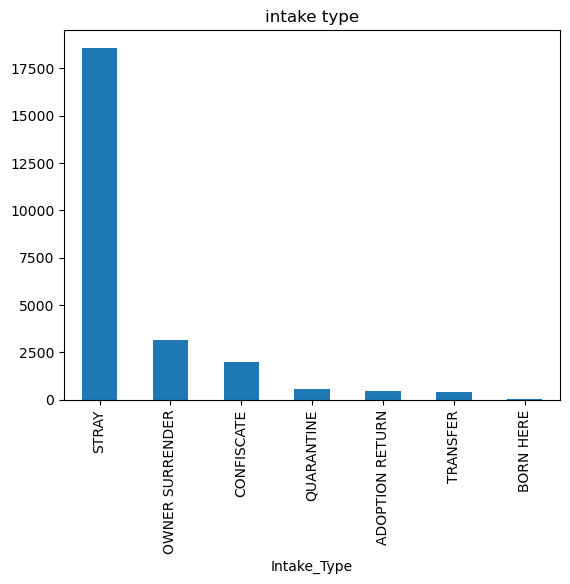

In [55]:
df.Intake_Type.value_counts().plot.bar()
plt.title('intake type')

Text(0.5, 1.0, 'intake subtype')

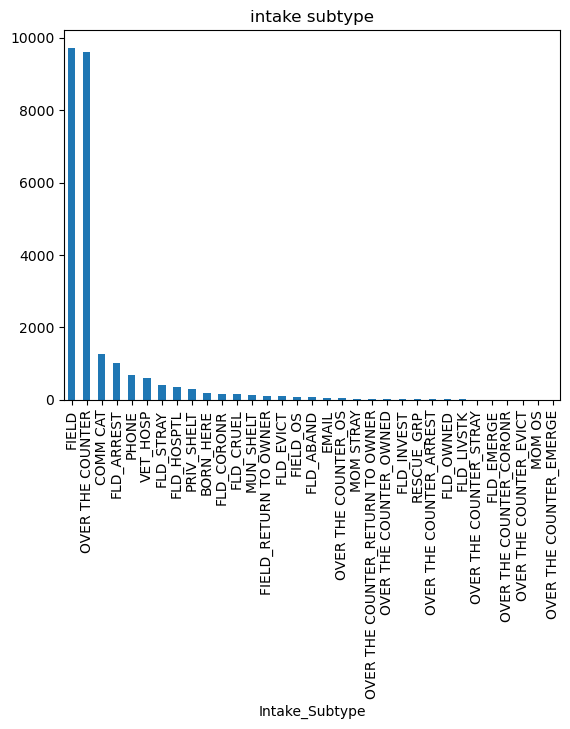

In [56]:
df.Intake_Subtype.value_counts().plot.bar()
plt.title('intake subtype')

## Most animals are not euthanized, but there are still a lot of animals in this category

Text(0.5, 1.0, 'Outcome type')

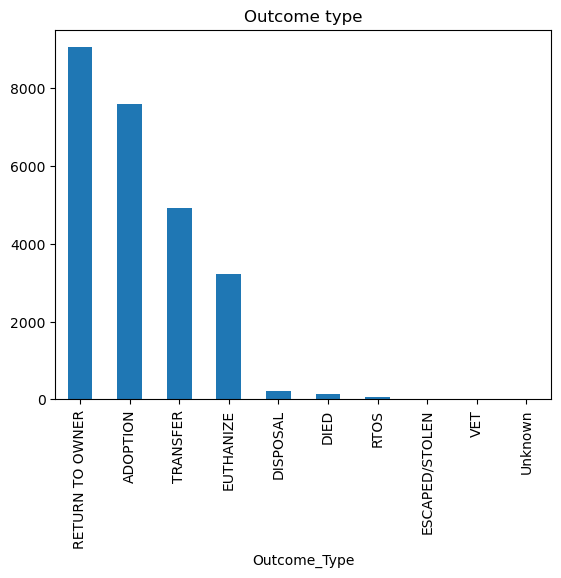

In [57]:
df.Outcome_Type.value_counts().plot.bar()
plt.title('Outcome type')

## outcome subtype has so many options. could be interesting to use NLP here

In [58]:
len(df.Outcome_Subtype.unique())

220

Text(0.5, 1.0, 'Outcome subtype')

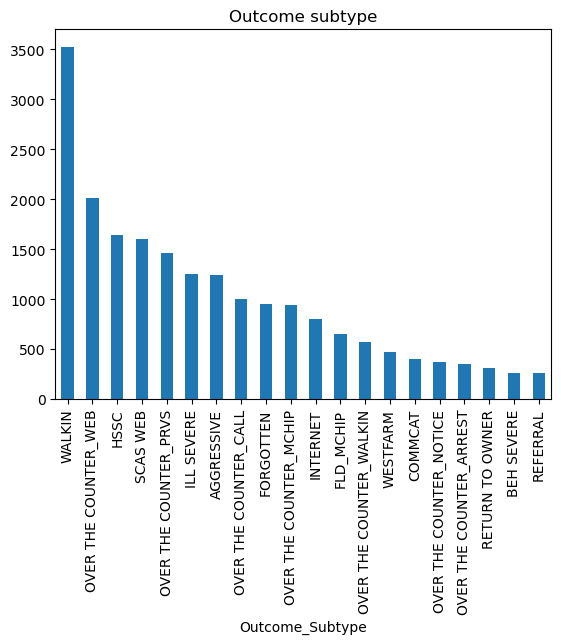

In [59]:
df.Outcome_Subtype.value_counts()[:20].plot.bar()
plt.title('Outcome subtype')

## most animals come in healthy, when is condition be unknown?

Text(0.5, 1.0, 'Intake_Condition')

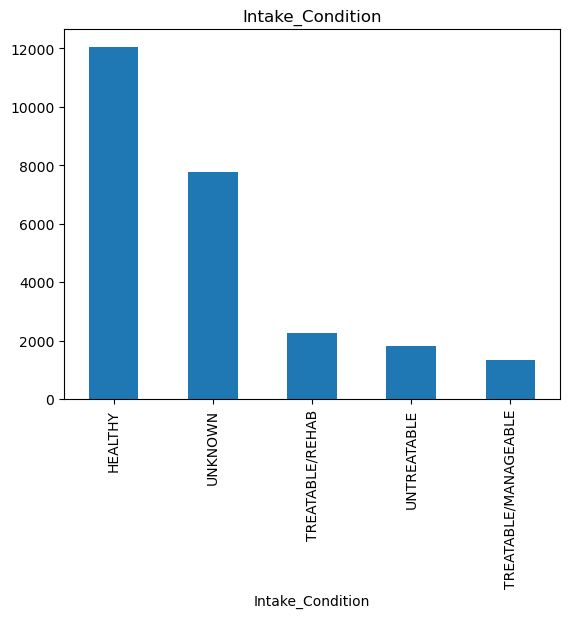

In [60]:
df.Intake_Condition.value_counts()[:20].plot.bar()
plt.title('Intake_Condition')

## it appears going to a shelter usually improves health

what does pending mean?

Text(0.5, 1.0, 'Outcome_Condition')

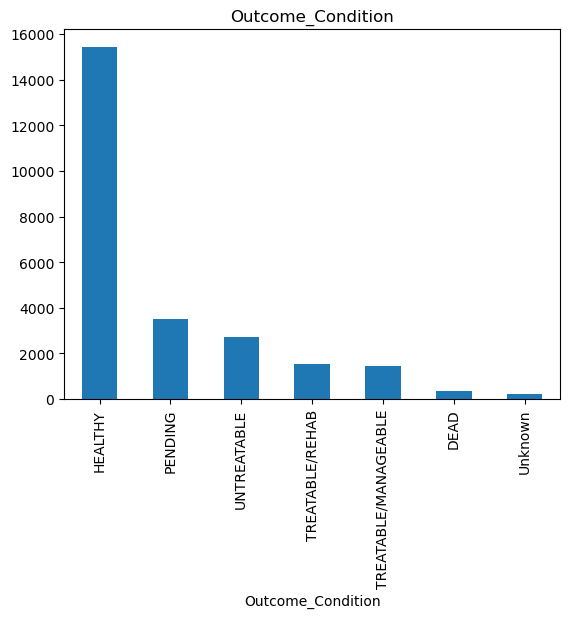

In [61]:
df.Outcome_Condition.value_counts()[:20].plot.bar()
plt.title('Outcome_Condition')

In [62]:
df.Intake_Jurisdiction.unique()

array(['COUNTY', 'SANTA ROSA', 'OUT OF COUNTY', '*WINDSOR',
       '*ROHNERT PARK', '*SEBASTOPOL', '*SONOMA', '*HEALDSBURG',
       '*TRIBAL RESV', '*PETALUMA', '*CLOVERDALE', '*COTATI', 'UNKNOWN'],
      dtype=object)

In [63]:
df[df.Outcome_Jurisdiction != df.Intake_Jurisdiction]

,Name,Type,Breed,Color,Sex,Size,Date_Of_Birth,Impound_Number,Kennel_Number,Animal_ID,...,Outcome_Zip_Code,Location,Multiple_Visit_Count,Age_inDays_at_Outcome,Age_Group,Is_Aggressive,Has_Name,Is_Fixed,Is_Mixed_Breed,Is_Multicolor
0,*STELLA,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,FEMALE,LARGE,2011-03-09,K15-014665,DS77,A272661,...,95403,"95403(38.4716444, -122.7398255)",1,1595,Adult,0,0,1,1,1
2,SHELDON,CAT,DOMESTIC SH,WHITE/BRN TABBY,MALE,KITTN,2013-12-01,K14-007903,CA02,A303331,...,94952,"94952(38.237, -122.640695)",1,90,Puppy/Kitten,0,1,1,0,1
3,Unknown,DOG,BORDER TERRIER/POODLE MIN,TAN/BLACK,MALE,MED,1900-01-01,K23-046938,DS55,A422495,...,95407,"95407(38.4127094, -122.7412153)",1,45267,Unknown,0,1,0,1,1
7,Unknown,CAT,DOMESTIC SH,GRAY TABBY,MALE,KITTN,2023-07-10,K23-045811,SMM,A419931,...,Unknown,Unknown,1,47,Puppy/Kitten,0,1,1,0,0
8,Unknown,DOG,PIT BULL,BLUE/WHITE,MALE,PUPPY,2016-11-24,K17-022158,CI02,A347007,...,Unknown,Unknown,1,47,Puppy/Kitten,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25226,KIPPER,CAT,DOMESTIC SH,GRAY TABBY,MALE,KITTN,2017-06-12,K17-024821,LOBBY,A356732,...,95492,"95492(38.541355, -122.80026)",1,78,Puppy/Kitten,0,1,1,0,0
25229,Unknown,DOG,PIT BULL,BLACK/WHITE,MALE,LARGE,1900-01-01,K16-019832,DS56,A339821,...,Unknown,Unknown,1,42582,Unknown,1,1,0,0,1
25230,CINNAMON,CAT,DOMESTIC SH,ORANGE,FEMALE,SMALL,1900-01-01,K17-025838,UCD,A362623,...,Unknown,Unknown,1,43038,Unknown,0,1,0,0,0
25232,*SIMON,CAT,DOMESTIC SH,BLACK,MALE,SMALL,2014-03-19,K14-009883,LOBBY,A309235,...,95448,"95448(38.613965, -122.869825)",1,127,Puppy/Kitten,0,0,1,0,0


## Thoughts
There are many categories for breed, color and outcome subtype. Perhaps too many. We may need to feature engineer these columns to group similar colors

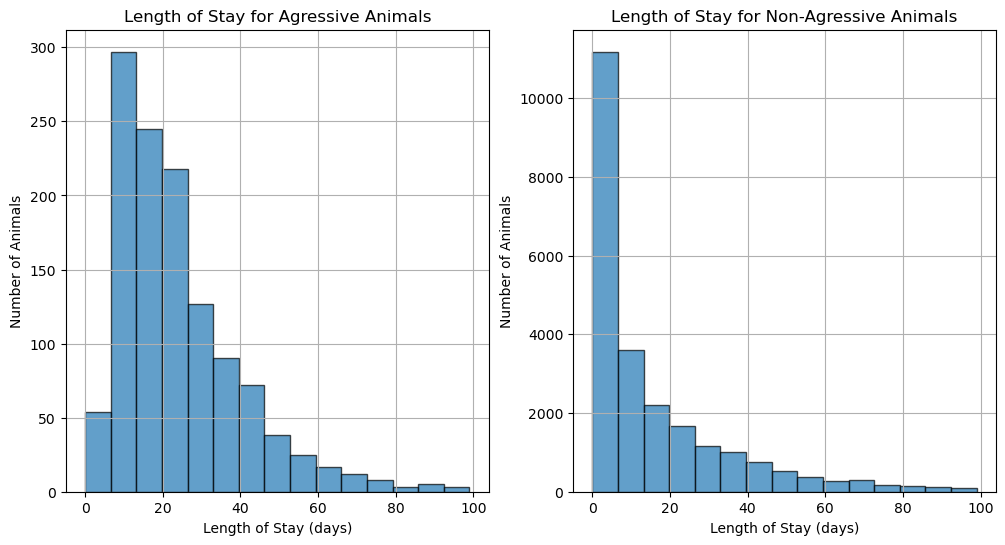

In [64]:
# Log transformation of the length of stay
df['Log Length of Stay'] = np.log1p(df['Days_in_Shelter'])  # log1p is used to handle log(0)

# Separate df for cats and dogs
agressive = df[df['Is_Aggressive'] == 1]
not_aggressive = df[df['Is_Aggressive'] == 0]

# Plot the log-transformed length of stay for cats
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(agressive[agressive.Days_in_Shelter<100]['Days_in_Shelter'].dropna(), bins=15, edgecolor='k', alpha=0.7)
plt.title('Length of Stay for Agressive Animals')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Animals')
plt.grid(True)

# Plot the log-transformed length of stay for dogs
plt.subplot(1, 2, 2)
plt.hist(not_aggressive[not_aggressive.Days_in_Shelter<100]['Days_in_Shelter'].dropna(), bins=15, edgecolor='k', alpha=0.7)
plt.title('Length of Stay for Non-Agressive Animals')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Animals')
plt.grid(True)


# Model V1

In [65]:
num_buckets = 5
class_labels = [i for i in range(num_buckets)]
df['label'], bin_edges = pd.qcut(df['Days_in_Shelter'], q=num_buckets, labels=class_labels, retbins=True)
df['range'] = pd.cut(df['Days_in_Shelter'], bins=bin_edges, include_lowest=True)

print(df['label'].value_counts())
print(df['range'].value_counts())


label
0    7170
3    5214
4    4875
2    4474
1    3502
Name: count, dtype: int64
range
(-0.001, 1.0]    7170
(13.0, 30.0]     5214
(30.0, 298.0]    4875
(5.0, 13.0]      4474
(1.0, 5.0]       3502
Name: count, dtype: int64


In [82]:
# 
df['location_zipcode'] = df['Location'].str.extract(r'(\d+)(?=\()')
df['intake_year'] = df['Intake_Date'].dt.year
df['intake_month'] = df['Intake_Date'].dt.month
df['intake_day'] = df['Intake_Date'].dt.day

df['birth_year'] = df['Date_Of_Birth'].dt.year
df['birth_month'] = df['Date_Of_Birth'].dt.month
df['birth_day'] = df['Date_Of_Birth'].dt.day


In [83]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date_Of_Birth',
       'Impound_Number', 'Kennel_Number', 'Animal_ID', 'Intake_Date',
       'Outcome_Date', 'Days_in_Shelter', 'Intake_Type', 'Intake_Subtype',
       'Outcome_Type', 'Outcome_Subtype', 'Intake_Condition',
       'Outcome_Condition', 'Intake_Jurisdiction', 'Outcome_Jurisdiction',
       'Outcome_Zip_Code', 'Location', 'Multiple_Visit_Count',
       'Age_inDays_at_Outcome', 'Age_Group', 'Is_Aggressive', 'Has_Name',
       'Is_Fixed', 'Is_Mixed_Breed', 'Is_Multicolor', 'Log Length of Stay',
       'label', 'range', 'location_zipcode', 'intake_year', 'intake_month',
       'intake_day', 'birth_year', 'birth_month', 'birth_day'],
      dtype='object')

In [86]:
df_model_v1 = df.drop(columns=[
  'Name',
  'Impound_Number', 
  'Animal_ID',
  'Outcome_Date',
  'Days_in_Shelter',
  'Outcome_Type',
  'Outcome_Subtype',
  'Outcome_Condition',
  'Outcome_Jurisdiction',
  'Outcome_Zip_Code',
  'Location',
  'range',
  'Log Length of Stay',
  'Intake_Date',
  'Date_Of_Birth',
  'location_zipcode'
  ])
df_model_v1.columns

Index(['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number', 'Intake_Type',
       'Intake_Subtype', 'Intake_Condition', 'Intake_Jurisdiction',
       'Multiple_Visit_Count', 'Age_inDays_at_Outcome', 'Age_Group',
       'Is_Aggressive', 'Has_Name', 'Is_Fixed', 'Is_Mixed_Breed',
       'Is_Multicolor', 'label', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day'],
      dtype='object')

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical features
label_encoders = {}
for column in ['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number','Intake_Type','Intake_Subtype','Intake_Condition','Intake_Jurisdiction','Age_Group',]:
    le = LabelEncoder()
    df_model_v1[column] = le.fit_transform(df_model_v1[column])
    label_encoders[column] = le

In [100]:
df_model_v1.dtypes

Type                        int64
Breed                       int64
Color                       int64
Sex                         int64
Size                        int64
Kennel_Number               int64
Intake_Type                 int64
Intake_Subtype              int64
Intake_Condition            int64
Intake_Jurisdiction         int64
Multiple_Visit_Count        int64
Age_inDays_at_Outcome       int64
Age_Group                   int64
Is_Aggressive               int64
Has_Name                    int64
Is_Fixed                    int64
Is_Mixed_Breed              int64
Is_Multicolor               int64
label                    category
intake_year                 int32
intake_month                int32
intake_day                  int32
birth_year                  int32
birth_month                 int32
birth_day                   int32
dtype: object

In [101]:
# Define features and target
X = df_model_v1[['Type', 'Breed', 'Color', 'Sex', 'Size', 'Kennel_Number', 'Intake_Type',
       'Intake_Subtype', 'Intake_Condition', 'Intake_Jurisdiction',
       'Multiple_Visit_Count', 'Age_inDays_at_Outcome', 'Age_Group',
       'Is_Aggressive', 'Has_Name', 'Is_Fixed', 'Is_Mixed_Breed',
       'Is_Multicolor', 'intake_year', 'intake_month', 'intake_day',
       'birth_year', 'birth_month', 'birth_day']]
y = df_model_v1['label']

In [102]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
# Train the model
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.83      0.63      1448
           1       0.29      0.09      0.14       673
           2       0.29      0.18      0.22       915
           3       0.39      0.29      0.33      1055
           4       0.47      0.54      0.50       956

    accuracy                           0.45      5047
   macro avg       0.39      0.39      0.37      5047
weighted avg       0.41      0.45      0.40      5047



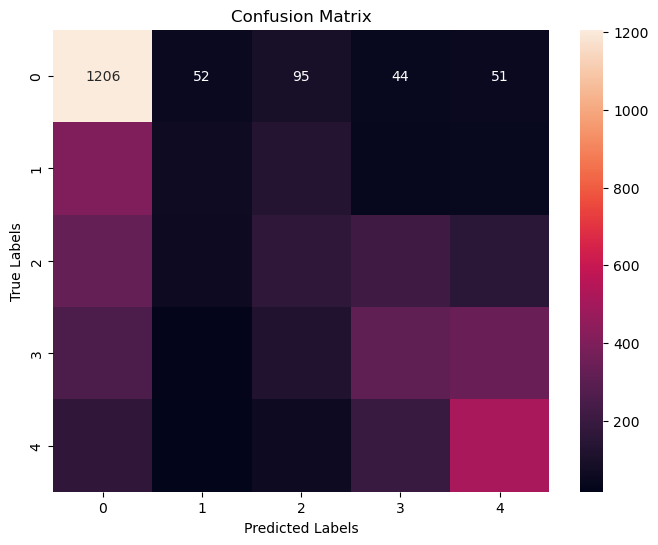

In [107]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [108]:
print(cm)

[[1206   52   95   44   51]
 [ 402   61  130   37   43]
 [ 328   57  164  216  150]
 [ 257   24  123  311  340]
 [ 168   18   58  198  514]]


## Random Forest

In [96]:
# Train the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.87      0.74      1448
           1       0.55      0.33      0.41       673
           2       0.56      0.42      0.48       915
           3       0.54      0.52      0.53      1055
           4       0.67      0.70      0.69       956

    accuracy                           0.61      5047
   macro avg       0.59      0.57      0.57      5047
weighted avg       0.60      0.61      0.60      5047



## Gradient Boosted

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions
y_pred = model_gb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.87      0.72      1448
           1       0.47      0.22      0.30       673
           2       0.50      0.37      0.42       915
           3       0.51      0.49      0.50      1055
           4       0.63      0.67      0.65       956

    accuracy                           0.57      5047
   macro avg       0.55      0.52      0.52      5047
weighted avg       0.56      0.57      0.55      5047

